# PROCESSED DATA EDA

In [134]:
import pandas as pd
import numpy as np

In [135]:
df = pd.read_csv('./data/flickr_data_processed.csv')
df.head()

,id,user,lat,long,tags,title,date_upload,date_taken,date_taken_bin,date_upload_bin,uploaded_via,foursquare_venue,links,file_title,people_tag
0,22653655033,77161041@N00,45.768121,4.801776,"square,sierra,squareformat,iphoneography,insta...",Enfin. #instabeer #beer #chimay #apero,2015-11-24 18:46:00+00:00,2015-11-24 18:46:00+00:00,evening,evening,instagram,4e0462c82271233b767cec75,NaN,NaN,NaN
1,22884818287,113280318@N03,45.759700,4.842200,"square,squareformat,iphoneography,instagramapp...",https://www.facebook.com/PascalFrontiPhotograp...,2015-11-24 17:03:00+00:00,2015-11-24 17:03:00+00:00,afternoon,afternoon,instagram,NaN,https://www.facebook.com/PascalFrontiPhotograp...,NaN,NaN
2,23277598065,132999708@N08,46.027633,4.699855,NaN,compagnons_dev_arnas20 (1),2015-11-24 15:50:00+00:00,2015-11-07 15:50:00+00:00,afternoon,afternoon,NaN,NaN,NaN,compagnons_dev_arnas20,NaN
3,22883485267,132999708@N08,46.027572,4.699966,NaN,compagnons_dev_arnas20 (3),2015-11-24 15:50:00+00:00,2015-11-07 15:50:00+00:00,afternoon,afternoon,NaN,NaN,NaN,compagnons_dev_arnas20,NaN
4,23249102166,133835212@N03,45.699105,4.474932,"sunset,sky,cloud,sun,soleil,coucherdesoleil,",Un soir dans les Monts du Lyonnais,2015-11-24 13:50:00+00:00,2015-08-31 20:50:00+00:00,evening,midday,NaN,NaN,NaN,NaN,NaN


____

In [136]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from yellowbrick.features import RadViz

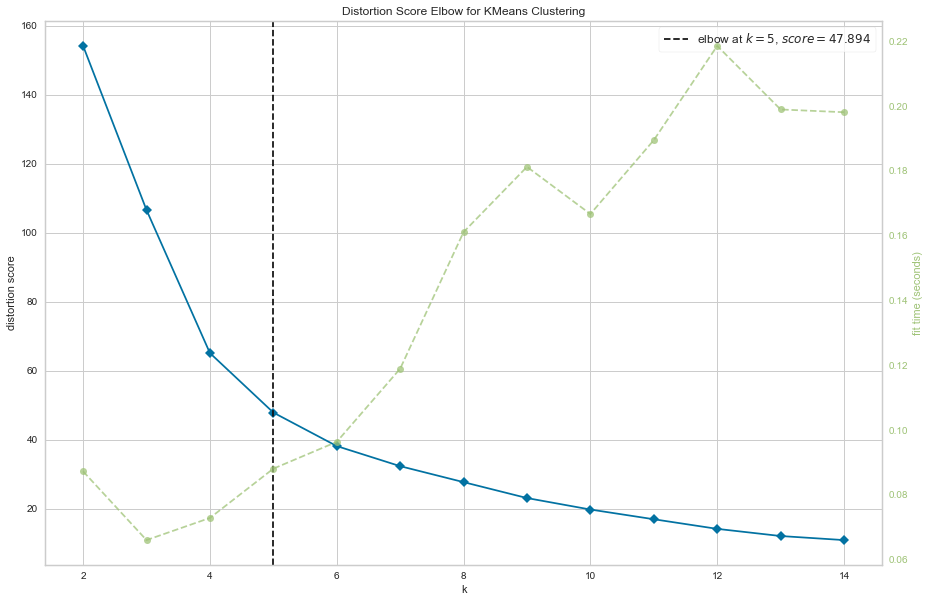

In [137]:
X = df[['lat', 'long']] 

visualizer = RadViz(size=(1080, 720))

model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(2,15))
visualizer.fit(X)
visualizer.show();

In [138]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
labels = kmeans.labels_

df_kmeans = pd.DataFrame(data = X, columns = X.columns)
df_kmeans['label_kmeans'] = labels

df = df.merge(df_kmeans, on=['lat', 'long'], how='left').drop_duplicates()

In [139]:
df.head()

,id,user,lat,long,tags,title,date_upload,date_taken,date_taken_bin,date_upload_bin,uploaded_via,foursquare_venue,links,file_title,people_tag,label_kmeans
0,22653655033,77161041@N00,45.768121,4.801776,"square,sierra,squareformat,iphoneography,insta...",Enfin. #instabeer #beer #chimay #apero,2015-11-24 18:46:00+00:00,2015-11-24 18:46:00+00:00,evening,evening,instagram,4e0462c82271233b767cec75,NaN,NaN,NaN,0
22,22884818287,113280318@N03,45.759700,4.842200,"square,squareformat,iphoneography,instagramapp...",https://www.facebook.com/PascalFrontiPhotograp...,2015-11-24 17:03:00+00:00,2015-11-24 17:03:00+00:00,afternoon,afternoon,instagram,NaN,https://www.facebook.com/PascalFrontiPhotograp...,NaN,NaN,0
69,23277598065,132999708@N08,46.027633,4.699855,NaN,compagnons_dev_arnas20 (1),2015-11-24 15:50:00+00:00,2015-11-07 15:50:00+00:00,afternoon,afternoon,NaN,NaN,NaN,compagnons_dev_arnas20,NaN,1
70,22883485267,132999708@N08,46.027572,4.699966,NaN,compagnons_dev_arnas20 (3),2015-11-24 15:50:00+00:00,2015-11-07 15:50:00+00:00,afternoon,afternoon,NaN,NaN,NaN,compagnons_dev_arnas20,NaN,1
71,23249102166,133835212@N03,45.699105,4.474932,"sunset,sky,cloud,sun,soleil,coucherdesoleil,",Un soir dans les Monts du Lyonnais,2015-11-24 13:50:00+00:00,2015-08-31 20:50:00+00:00,evening,midday,NaN,NaN,NaN,NaN,NaN,4


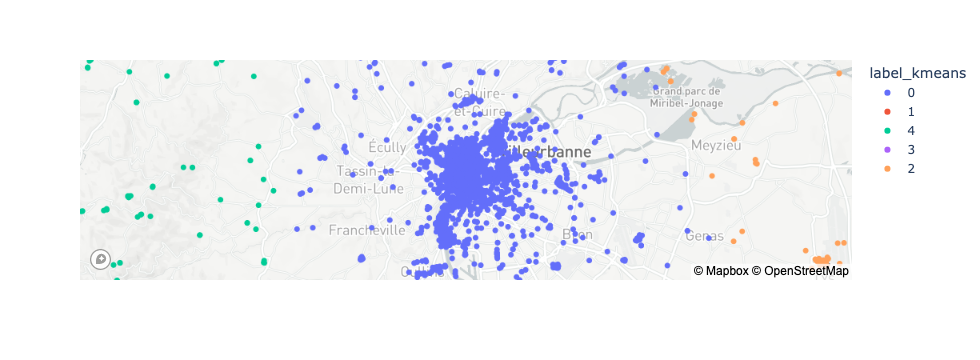

In [140]:
import plotly.express as px
px.set_mapbox_access_token(open(".mapbox_token").read())

df['label_kmeans'] = df['label_kmeans'].astype(str)
fig = px.scatter_mapbox(df, lat='lat', lon='long', color='label_kmeans',
                  color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=10)
fig.show()

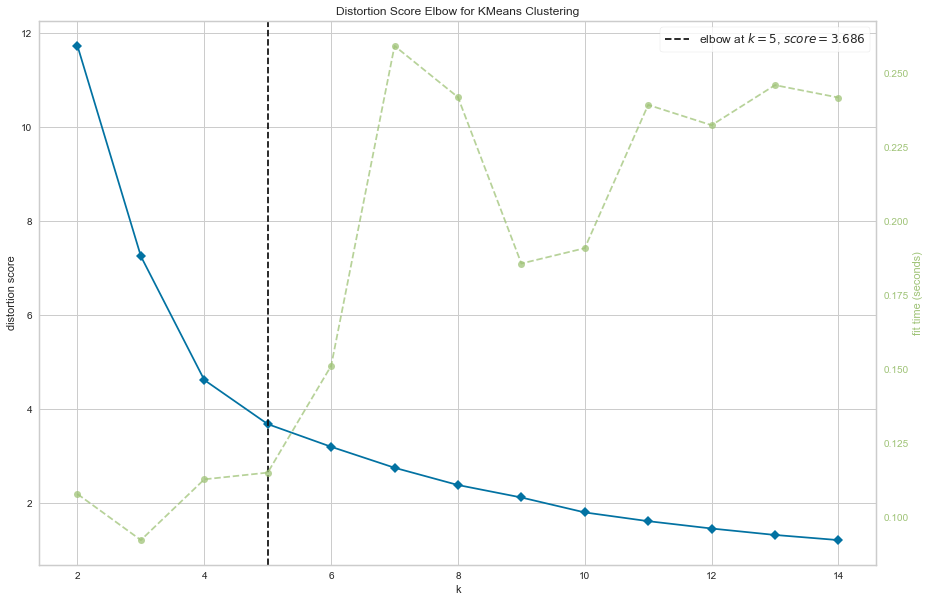

In [141]:
X = df[df['label_kmeans'] == '0'][['lat', 'long']]

visualizer = RadViz(size=(1080, 720))

model = KMeans(random_state=43)
visualizer = KElbowVisualizer(model, k=(2,15))
visualizer.fit(X)
visualizer.show();

In [142]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
labels = kmeans.labels_

df_kmeans = pd.DataFrame(data = X, columns = X.columns)
df_kmeans['label_kmeans_2'] = labels

df = df.merge(df_kmeans, on=['lat', 'long']).drop_duplicates()

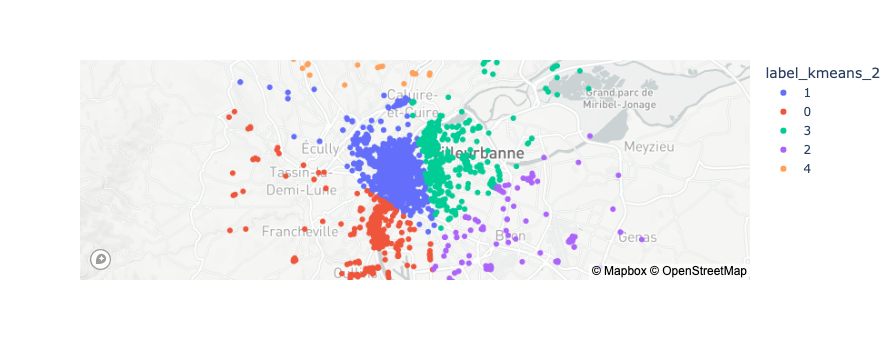

In [185]:
df['label_kmeans_2'] = df['label_kmeans_2'].astype(str)

df_k2 = df
fig = px.scatter_mapbox(df_k2, lat='lat', lon='long', color='label_kmeans_2',
                  color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=10)
fig.show()

In [183]:
stations = [
    ["Ampère - Victor Hugo", 45.753051458018, 4.8291617631912, "https://www.metrolinemap.com/station/lyon/ampere-victor-hugo/",
        "<span class='input-color5'><span title='Line A ' class='color-box5' style='background-color: #EE3897;cursor: help'>A </span></span>"],
    ["Bellecour", 45.757524205684, 4.8328551650047, "https://www.metrolinemap.com/station/lyon/bellecour/",
        "<span class='input-color5'><span title='Line A ' class='color-box5' style='background-color: #EE3897;cursor: help'>A </span></span><span class='input-color5'><span title='Line D' class='color-box5' style='background-color: #00AC4F;cursor: help'>D</span></span>"],
    ["Brotteaux", 45.76712068878, 4.8593594133854, "https://www.metrolinemap.com/station/lyon/brotteaux/",
        "<span class='input-color5'><span title='Line B' class='color-box5' style='background-color: #007DC6;cursor: help'>B</span></span>"],
    ["Charpennes", 45.770480050134, 4.8632177710533, "https://www.metrolinemap.com/station/lyon/charpennes/",
        "<span class='input-color5'><span title='Line A ' class='color-box5' style='background-color: #EE3897;cursor: help'>A </span></span><span class='input-color5'><span title='Line B' class='color-box5' style='background-color: #007DC6;cursor: help'>B</span></span>"],
    ["Cordeliers", 45.763309238527, 4.8358297348022, "https://www.metrolinemap.com/station/lyon/cordeliers/",
        "<span class='input-color5'><span title='Line A ' class='color-box5' style='background-color: #EE3897;cursor: help'>A </span></span>"],
    ["Croix-Paquet", 45.771014198946, 4.8362039029598, "https://www.metrolinemap.com/station/lyon/croix-paquet/",
        "<span class='input-color5'><span title='Line C' class='color-box5' style='background-color: #F99D1C;cursor: help'>C</span></span>"],
    ["Croix-Rousse", 45.774508958814, 4.831999540329, "https://www.metrolinemap.com/station/lyon/croix-rousse/",
        "<span class='input-color5'><span title='Line C' class='color-box5' style='background-color: #F99D1C;cursor: help'>C</span></span>"],
    ["Cuire", 45.78532112202, 4.8326325416565, "https://www.metrolinemap.com/station/lyon/cuire/",
        "<span class='input-color5'><span title='Line C' class='color-box5' style='background-color: #F99D1C;cursor: help'>C</span></span>"],
    ["Cusset", 45.765632252085, 4.9008411169052, "https://www.metrolinemap.com/station/lyon/cusset/",
        "<span class='input-color5'><span title='Line A ' class='color-box5' style='background-color: #EE3897;cursor: help'>A </span></span>"],
    ["Debourg", 45.731067091943, 4.8334519565105, "https://www.metrolinemap.com/station/lyon/debourg/",
        "<span class='input-color5'><span title='Line B' class='color-box5' style='background-color: #007DC6;cursor: help'>B</span></span>"],
    ["Flachet", 45.767755905171, 4.8892848193645, "https://www.metrolinemap.com/station/lyon/flachet/",
        "<span class='input-color5'><span title='Line A ' class='color-box5' style='background-color: #EE3897;cursor: help'>A </span></span>"],
    ["Foch", 45.768749410264, 4.8443953692913, "https://www.metrolinemap.com/station/lyon/foch/",
        "<span class='input-color5'><span title='Line A ' class='color-box5' style='background-color: #EE3897;cursor: help'>A </span></span>"],
    ["Gare d'Oullins", 45.716688198228, 4.814524948597, "https://www.metrolinemap.com/station/lyon/gare-d-oullins/",
        "<span class='input-color5'><span title='Line B' class='color-box5' style='background-color: #007DC6;cursor: help'>B</span></span>"],
    ["Gare de Vaise", 45.780570949717, 4.8045176267624, "https://www.metrolinemap.com/station/lyon/gare-de-vaise/",
        "<span class='input-color5'><span title='Line D' class='color-box5' style='background-color: #00AC4F;cursor: help'>D</span></span>"],
    ["Gare de Vénissieux", 45.705462824299, 4.8880013823509, "https://www.metrolinemap.com/station/lyon/gare-de-venissieux/",
        "<span class='input-color5'><span title='Line D' class='color-box5' style='background-color: #00AC4F;cursor: help'>D</span></span>"],
    ["Gare Part-Dieu", 45.761665388372, 4.8578895628452, "https://www.metrolinemap.com/station/lyon/gare-part-dieu/",
        "<span class='input-color5'><span title='Line B' class='color-box5' style='background-color: #007DC6;cursor: help'>B</span></span>"],
    ["Garibaldi", 45.751607563561, 4.8534826934338, "https://www.metrolinemap.com/station/lyon/garibaldi/",
        "<span class='input-color5'><span title='Line D' class='color-box5' style='background-color: #00AC4F;cursor: help'>D</span></span>"],
    ["Gorge de Loup", 45.766437752926, 4.8054872453213, "https://www.metrolinemap.com/station/lyon/gorge-de-loup/",
        "<span class='input-color5'><span title='Line D' class='color-box5' style='background-color: #00AC4F;cursor: help'>D</span></span>"],
    ["Grange-Blanche", 45.742930309355, 4.8788429796696, "https://www.metrolinemap.com/station/lyon/grange-blanche/",
        "<span class='input-color5'><span title='Line D' class='color-box5' style='background-color: #00AC4F;cursor: help'>D</span></span>"],
    ["Gratte-Ciel", 45.769038477632, 4.8823083937168, "https://www.metrolinemap.com/station/lyon/gratte-ciel/",
        "<span class='input-color5'><span title='Line A ' class='color-box5' style='background-color: #EE3897;cursor: help'>A </span></span>"],
    ["Guillotière - Gabriel Péri", 45.755336534147, 4.8428303003311, "https://www.metrolinemap.com/station/lyon/guillotiere-gabriel-peri/",
        "<span class='input-color5'><span title='Line D' class='color-box5' style='background-color: #00AC4F;cursor: help'>D</span></span>"],
    ["Hénon", 45.779500024096, 4.8275202512741, "https://www.metrolinemap.com/station/lyon/henon/",
        "<span class='input-color5'><span title='Line C' class='color-box5' style='background-color: #F99D1C;cursor: help'>C</span></span>"],
    ["Hôtel de Ville - Louis Pradel", 45.767268501192, 4.836053699255, "https://www.metrolinemap.com/station/lyon/hotel-de-ville-louis-pradel/",
        "<span class='input-color5'><span title='Line A ' class='color-box5' style='background-color: #EE3897;cursor: help'>A </span></span><span class='input-color5'><span title='Line C' class='color-box5' style='background-color: #F99D1C;cursor: help'>C</span></span>"],
    ["Jean Macé", 45.744959833321, 4.8418378829956, "https://www.metrolinemap.com/station/lyon/jean-mace/",
        "<span class='input-color5'><span title='Line B' class='color-box5' style='background-color: #007DC6;cursor: help'>B</span></span>"],
    ["Laënnec", 45.738363727669, 4.8865623772144, "https://www.metrolinemap.com/station/lyon/laennec/",
        "<span class='input-color5'><span title='Line D' class='color-box5' style='background-color: #00AC4F;cursor: help'>D</span></span>"],
    ["Laurent Bonnevay", 45.764129742081, 4.9088273942471, "https://www.metrolinemap.com/station/lyon/laurent-bonnevay/",
        "<span class='input-color5'><span title='Line A ' class='color-box5' style='background-color: #EE3897;cursor: help'>A </span></span>"],
    ["Masséna", 45.769586672474, 4.8534236848354, "https://www.metrolinemap.com/station/lyon/massena/",
        "<span class='input-color5'><span title='Line A ' class='color-box5' style='background-color: #EE3897;cursor: help'>A </span></span>"],
    ["Mermoz-Pinel", 45.730563453178, 4.8872838914394, "https://www.metrolinemap.com/station/lyon/mermoz-pinel/",
        "<span class='input-color5'><span title='Line D' class='color-box5' style='background-color: #00AC4F;cursor: help'>D</span></span>"],
    ["Monplaisir-Lumière", 45.745510604478, 4.8713663220406, "https://www.metrolinemap.com/station/lyon/monplaisir-lumiere/",
        "<span class='input-color5'><span title='Line D' class='color-box5' style='background-color: #00AC4F;cursor: help'>D</span></span>"],
    ["Parilly", 45.719514086261, 4.8875360190868, "https://www.metrolinemap.com/station/lyon/parilly/",
        "<span class='input-color5'><span title='Line D' class='color-box5' style='background-color: #00AC4F;cursor: help'>D</span></span>"],
    ["Perrache", 45.749620860941, 4.8267692327499, "https://www.metrolinemap.com/station/lyon/perrache/",
        "<span class='input-color5'><span title='Line A ' class='color-box5' style='background-color: #EE3897;cursor: help'>A </span></span>"],
    ["Place Guichard", 45.759200925808, 4.8473726212978, "https://www.metrolinemap.com/station/lyon/place-guichard/",
        "<span class='input-color5'><span title='Line B' class='color-box5' style='background-color: #007DC6;cursor: help'>B</span></span>"],
    ["Place Jean Jaurès", 45.737566245707, 4.837325066328, "https://www.metrolinemap.com/station/lyon/place-jean-jaures/",
        "<span class='input-color5'><span title='Line B' class='color-box5' style='background-color: #007DC6;cursor: help'>B</span></span>"],
    ["République Villeurbanne", 45.770575467635, 4.8739895224571, "https://www.metrolinemap.com/station/lyon/republique-villeurbanne/",
        "<span class='input-color5'><span title='Line A ' class='color-box5' style='background-color: #EE3897;cursor: help'>A </span></span>"],
    ["Sans-Souci", 45.747573257347, 4.865236133337, "https://www.metrolinemap.com/station/lyon/sans-souci/",
        "<span class='input-color5'><span title='Line D' class='color-box5' style='background-color: #00AC4F;cursor: help'>D</span></span>"],
    ["Saxe-Gambetta", 45.753917963911, 4.8469568789005, "https://www.metrolinemap.com/station/lyon/saxe-gambetta/",
        "<span class='input-color5'><span title='Line B' class='color-box5' style='background-color: #007DC6;cursor: help'>B</span></span><span class='input-color5'><span title='Line D' class='color-box5' style='background-color: #00AC4F;cursor: help'>D</span></span>"],
    ["Stade de Gerland", 45.7267523145, 4.8308461904526, "https://www.metrolinemap.com/station/lyon/stade-de-gerland/",
        "<span class='input-color5'><span title='Line B' class='color-box5' style='background-color: #007DC6;cursor: help'>B</span></span>"],
    ["Valmy", 45.774598757038, 4.8053987324238, "https://www.metrolinemap.com/station/lyon/valmy/",
        "<span class='input-color5'><span title='Line D' class='color-box5' style='background-color: #00AC4F;cursor: help'>D</span></span>"],
    ["Vaulx-en-Velin - La Soie", 45.761213484822, 4.921872317791, "https://www.metrolinemap.com/station/lyon/vaulx-en-velin-la-soie/",
        "<span class='input-color5'><span title='Line A ' class='color-box5' style='background-color: #EE3897;cursor: help'>A </span></span>"],
    ["Vieux Lyon - Cathédrale St.Jean", 45.760222652427, 4.8256225883961, "https://www.metrolinemap.com/station/lyon/vieux-lyon-cathedrale-st-jean/",
        "<span class='input-color5'><span title='Line D' class='color-box5' style='background-color: #00AC4F;cursor: help'>D</span></span>"]
]

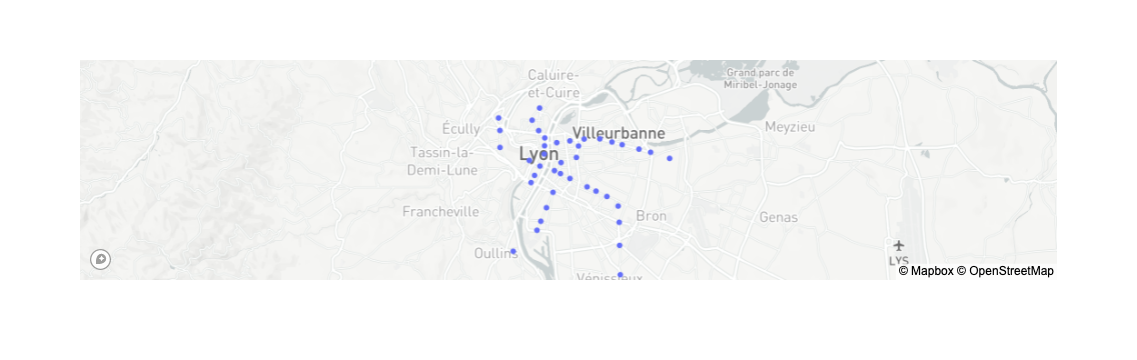

In [182]:
stations_data = []

for x in stations:
    stations_data.append([x[0], x[1], x[2]])
    
stations_df = pd.DataFrame(stations_data, columns=['station_name', 'lat', 'long'])

fig = px.scatter_mapbox(stations_df, lat='lat', lon='long', zoom=10)

fig.show()